In [61]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Danie\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [104]:
#load the data
df_data= pd.read_csv('C:/Users/Danie/Desktop/ProyectoResidencias/PlotGaia/Data/WW/BB1_BP.csv')


In [106]:
df_data.head() # first 5 entries

,wave,flux
0,1817.164934,-4.852254
1,1790.102205,-6.314736
2,1763.812741,3.012893
3,1738.264695,47.509563
4,1713.427949,924.206285


In [107]:
df_data.tail() # last 5 entries

,wave,flux
473,307.497130,528.109919
474,307.183757,381.371806
475,306.871524,260.143221
476,306.560424,167.647782
477,306.250451,104.053455


In [108]:
df_data.info() # información sobre las filas y columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wave    478 non-null    float64
 1   flux    478 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


In [110]:
df_data.corr() #Correlacion entre columnas

,wave,flux
wave,1.000000,-0.249585
flux,-0.249585,1.000000


In [111]:
df_data.describe() # infos estadisticas de las columnas

,wave,flux
count,478.000000,4.780000e+02
mean,573.308047,3.018281e+06
std,324.555308,2.714530e+06
min,306.250451,-6.314736e+00
25%,353.568282,9.234131e+04
50%,440.462962,2.264746e+06
75%,659.587061,6.041242e+06
max,1817.164934,6.043509e+06


<AxesSubplot:ylabel='wave'>

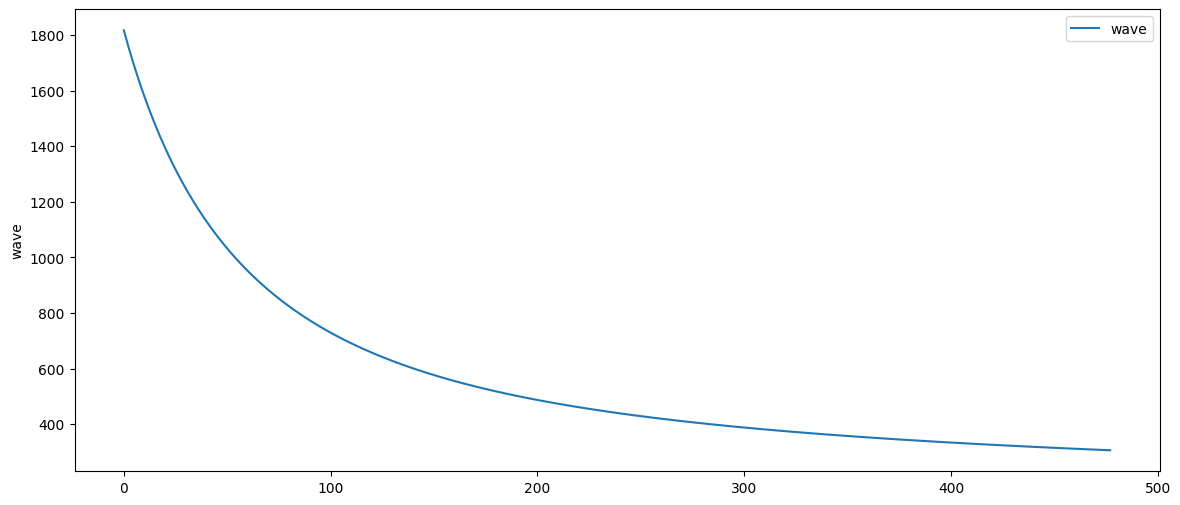

In [112]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))


# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=df_data['wave'], label="wave")

<AxesSubplot:ylabel='flux'>

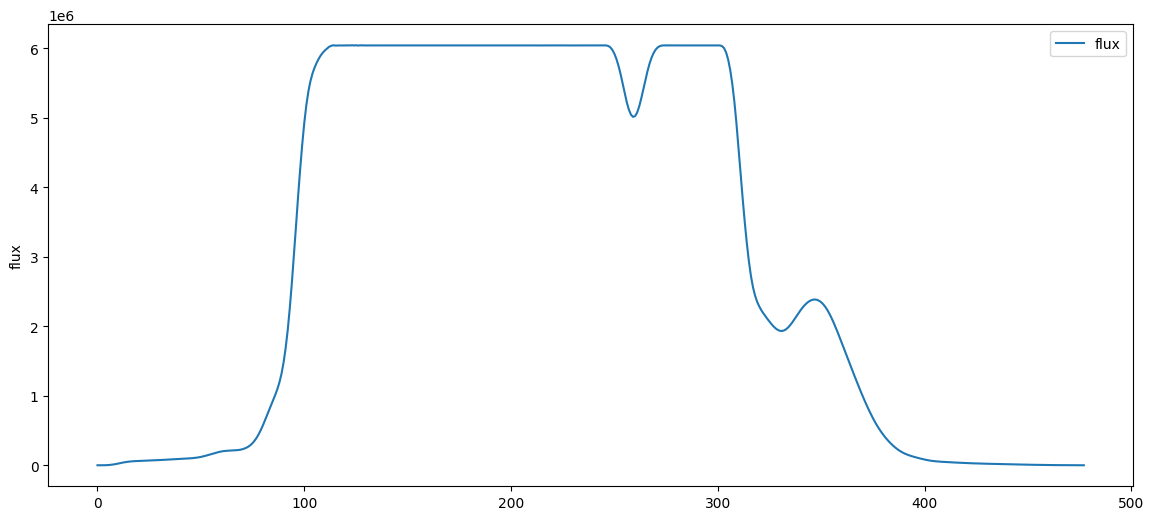

In [113]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))


# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=df_data['flux'], label="flux")

In [114]:
wave = df_data['wave']
flux = df_data['flux']

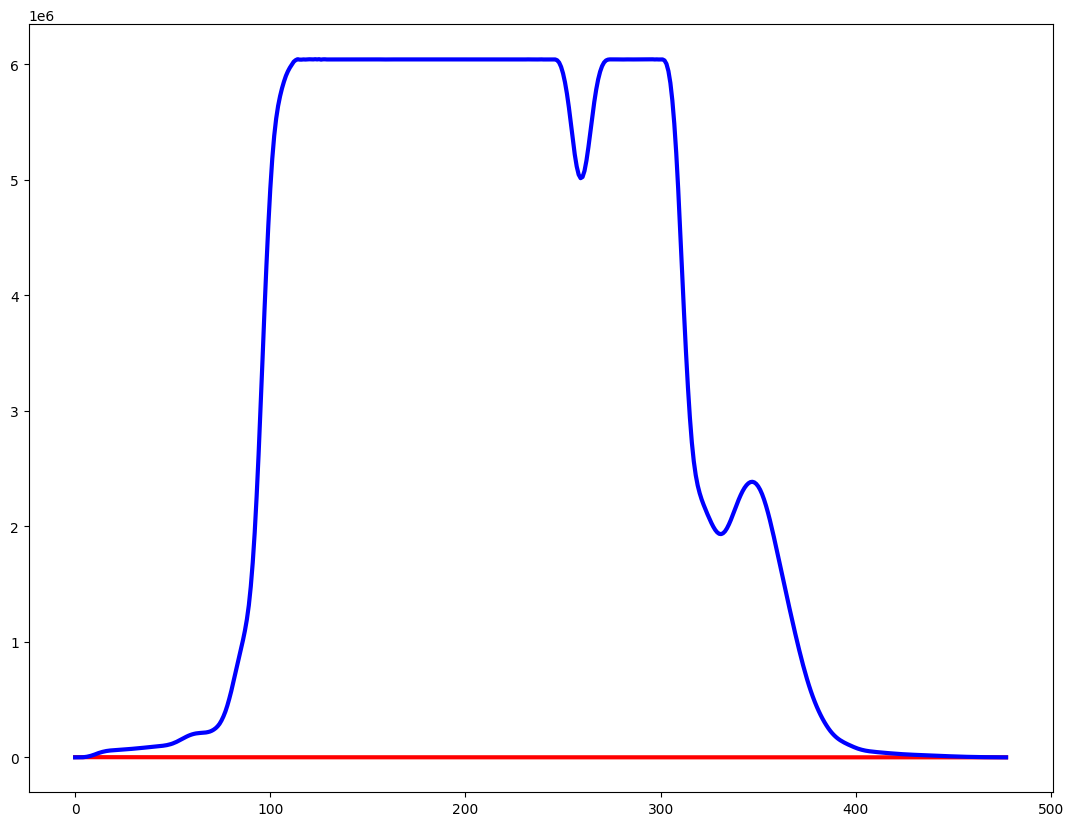

In [115]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(wave,'r',lw = 3,label = 'Wave')
myaxes.plot(flux,'b',lw = 3,label = 'Flux')

<AxesSubplot:title={'center':'Flux and Wave'}>

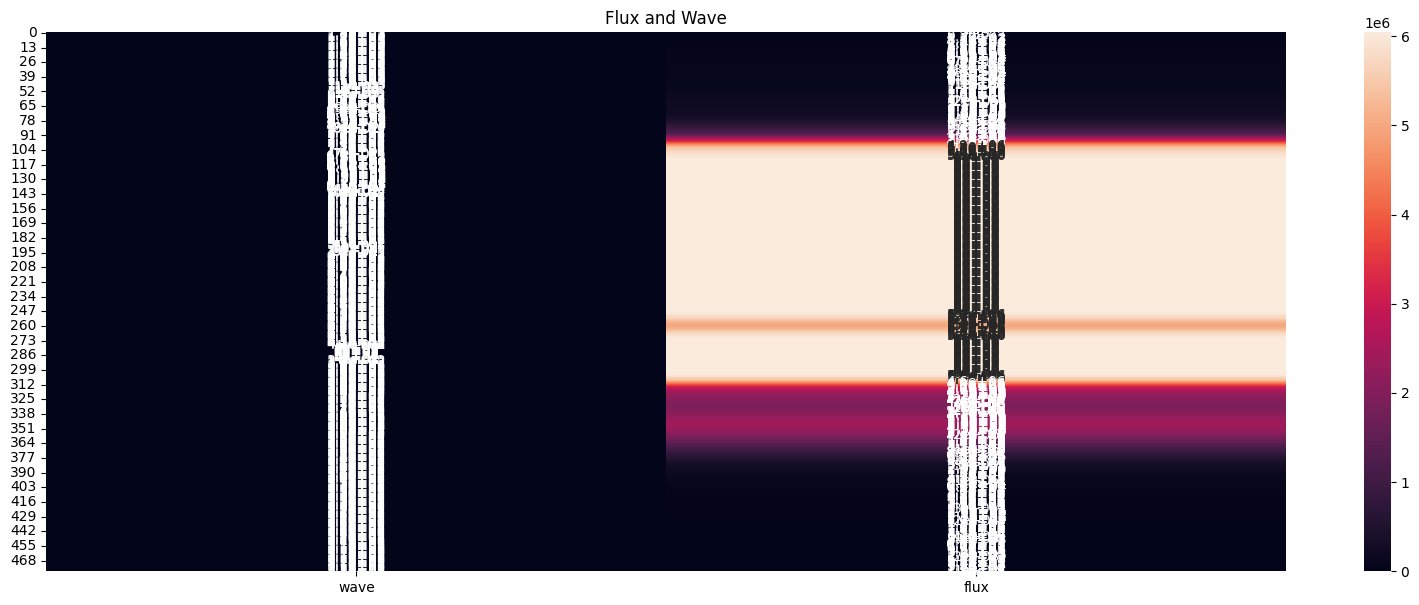

In [116]:
# Set the width and height of the figure
plt.figure(figsize=(20,7))

# Add title
plt.title("Flux and Wave")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df_data, annot=True)

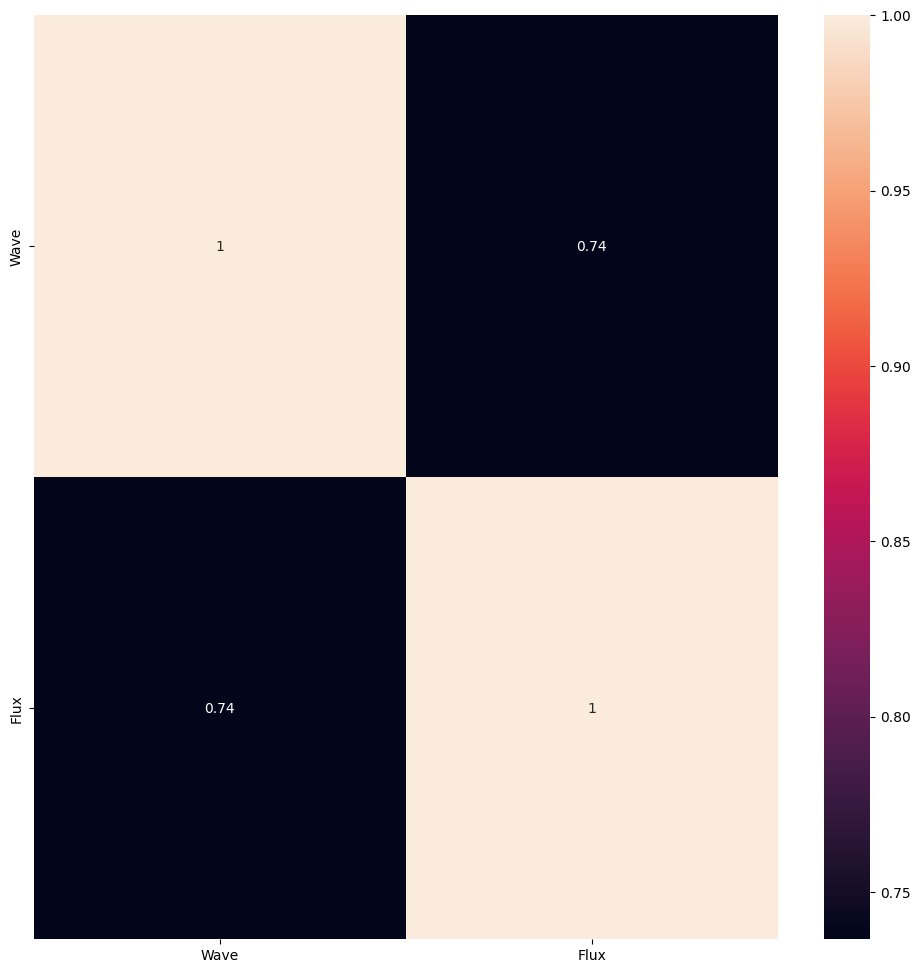

In [117]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True);

<AxesSubplot:xlabel='flux', ylabel='wave'>

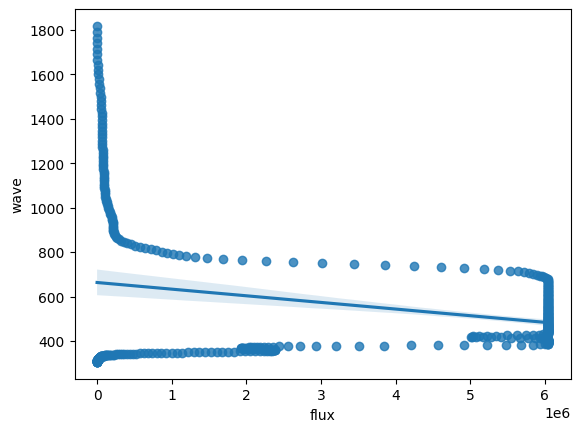

In [118]:
#sns.scatterplot(x=df_data['Flux'], y=df_data['Wave'])
sns.regplot(x=df_data['flux'], y=df_data['wave'])

C:\Users\Danie\AppData\Local\Temp\ipykernel_30456\3429895664.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot:xlabel='flux', ylabel='Density'>

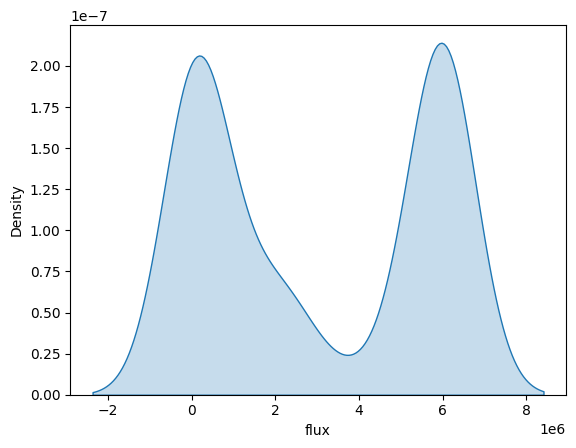

In [119]:
# KDE plot ( Grafico de densidad histograma suavizado)
sns.kdeplot(data=df_data['flux'], shade=True)

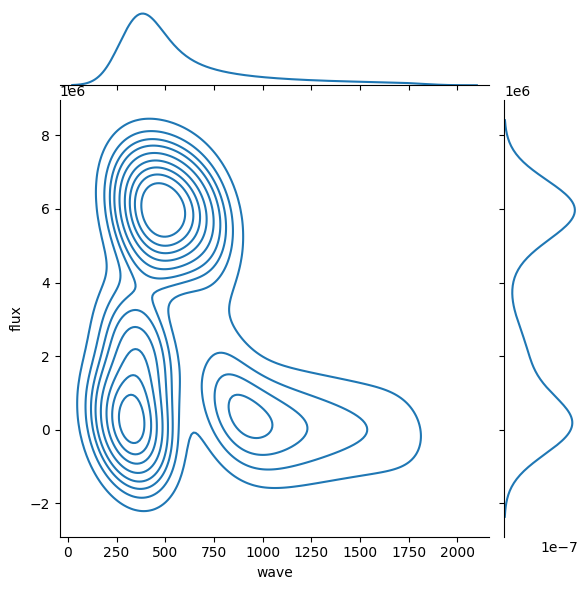

In [120]:
# 2D KDE plot 
# El código de colores nos muestra qué tan probable es que veamos diferentes combinaciones de ancho de sépalo y largo de pétalo, 
# donde las partes más oscuras de la figura son más probables.
sns.jointplot(x=df_data['wave'], y=df_data['flux'], kind="kde")

C:\Users\Danie\AppData\Local\Temp\ipykernel_30456\2296186233.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Danie\AppData\Local\Temp\ipykernel_30456\2296186233.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




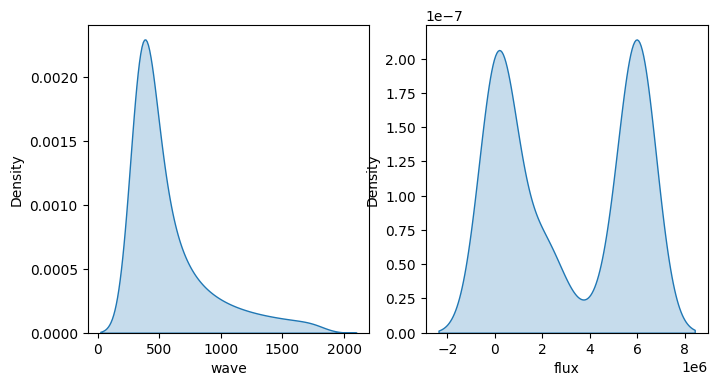

In [121]:
#Comportamiento de las dos variables
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(df_data.wave, shade=True, ax=axs[0])
sns.kdeplot(df_data.flux, shade=True, ax=axs[1]);

**CLASIFICACION RANDOM FOREST**


In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [329]:
X=df_data['wave']
y=df_data['flux']

In [330]:
X= X.values.reshape(-1,1)
X.shape

(478, 1)

In [331]:
y= y.values.reshape(-1,1)
y.shape

(478, 1)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [333]:
BA_model=RandomForestRegressor(n_estimators=19,random_state=2016,min_samples_leaf=8,)

In [319]:
from sklearn import utils
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous


c:\Users\Danie\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [334]:
BA_model.fit(X_train,y_train)

C:\Users\Danie\AppData\Local\Temp\ipykernel_30456\4132545851.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(min_samples_leaf=8, n_estimators=19, random_state=2016)

In [335]:
BA_model.score(X_test,y_test)

0.9874694109255533